#### Notebook by Bruno Pasini

github.com/brunompasini

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


## Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop

## Reading Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
x_train = train.drop(['label'], axis=1)
y_train = train['label']

## Normalizing and Reshaping

In [4]:
x_train = x_train/255.0
test = test/255.0

In [5]:
x_train.shape
# images are 28x28 but are 784 px in line
# and another dimension bc they are in grayscale

x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

x_train.shape

(42000, 28, 28, 1)

## CNN Model

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation='softmax')
])
#dropout lacking
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [18]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 100)

Epoch 1/10
420/420 [==============================] - 58s 138ms/step - loss: 0.2350 - accuracy: 0.9270
Epoch 2/10
420/420 [==============================] - 58s 138ms/step - loss: 0.0664 - accuracy: 0.9790
Epoch 3/10
420/420 [==============================] - 57s 137ms/step - loss: 0.0463 - accuracy: 0.9846
Epoch 4/10
420/420 [==============================] - 57s 136ms/step - loss: 0.0398 - accuracy: 0.9879
Epoch 5/10
420/420 [==============================] - 57s 137ms/step - loss: 0.0328 - accuracy: 0.9899
Epoch 6/10
420/420 [==============================] - 57s 136ms/step - loss: 0.0274 - accuracy: 0.9910
Epoch 7/10
420/420 [==============================] - 57s 136ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 8/10
420/420 [==============================] - 57s 135ms/step - loss: 0.0212 - accuracy: 0.9935
Epoch 9/10
420/420 [==============================] - 57s 135ms/step - loss: 0.0198 - accuracy: 0.9935
Epoch 10/10
420/420 [==============================] - 57s 135ms/step - l

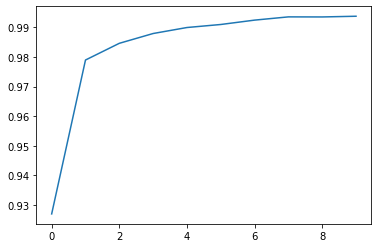

In [19]:
plt.plot(history.history['accuracy'])

In [21]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_kaggle.csv",index=False)

In [ ]:
# got a 0.99142 score on kaggle